# Bellabeat Case Study: How Can a Wellness Technology Company Play It Smart?

## Introduction

This project is the capstone of the **Google Data Analytics Professional Certificate**.  
In this case study, I will work as a junior data analyst on the marketing analytics team at **Bellabeat**, a high-tech manufacturer of health-focused products for women.

The main objective is to **analyze smart device usage data** to uncover trends in consumer habits. 

These insights will then be applied to the **Bellabeat App** to help guide the company’s marketing strategy and improve customer engagement.

### About Bellabeat
Founded in 2013 by **Urška Sršen** and **Sando Mur**, Bellabeat has quickly grown into a tech-driven wellness company. Its product line includes:  
- **Bellabeat App** - Tracks activity, sleep, stress, menstrual cycle, and mindfulness.  
- **Leaf** - A wearable tracker (bracelet, necklace, or clip).  
- **Time** - A wellness-focused smartwatch.  
- **Spring** - A smart water bottle that tracks hydration.  
- **Bellabeat Membership** - Personalized wellness guidance and coaching.

### Case Study Goal
By analyzing data from **non-Bellabeat smart devices** (Fitbit fitness tracker dataset), I aim to answer the following guiding questions:  
1. What are the key trends in smart device usage?  
2. How could these trends apply to Bellabeat customers?  
3. How could these trends influence Bellabeat’s marketing strategy?

The final deliverable will include:  
- A summary of the business task  
- Description of data sources used  
- Documentation of cleaning and processing steps  
- Analytical insights and visualizations  
- High-level marketing recommendations for Bellabeat  

This project demonstrates the full **data analysis process**:  
**Ask > Prepare > Process > Analyze > Share > Act**

## Ask Phase

### Business Task
The goal of this analysis is to explore how consumers use non-Bellabeat smart devices in order to identify common trends and habits in activity, sleep, and wellness. 

These insights will be applied to the **Bellabeat App**, with the purpose of guiding marketing strategy and enhancing user engagement.  


### Stakeholders
- **Urška Sršen** - Cofounder and Chief Creative Officer of Bellabeat  
- **Sando Mur** - Cofounder and key member of the executive team  
- **Bellabeat Marketing Analytics Team** - Responsible for data analysis and strategic recommendations  


### Guiding Questions
1. What are the key trends in smart device usage?  
2. How could these trends apply to Bellabeat customers?  
3. How could these trends influence Bellabeat’s marketing strategy?  


### Expected Outcome
By identifying and analyzing trends in smart device usage, the analysis will deliver **data-driven insights** that can inform Bellabeat’s marketing decisions, improve customer targeting, and increase engagement with the Bellabeat App.  


## Prepare Phase

### Data Sources
- **Fitbit Fitness Tracker Dataset** (public domain, via Kaggle):  
  - Collected from **30 Fitbit users** who consented to share personal fitness tracker data.  
  - Includes **minute-level data** on activity, heart rate, steps, and sleep monitoring.  
  - Source: [Kaggle – Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)


### Data Organization
- The dataset is structured in multiple **CSV files**.  
- Files are generally in **wide format**, where each row represents a user’s daily record, and columns contain activity or health metrics (e.g., steps, calories, minutes asleep).  
- Some tables provide **minute-by-minute** logs, requiring aggregation for higher-level insights.  


### ROCCC Analysis (Data Credibility)
- **Reliable:** Collected directly from Fitbit devices, but limited sample size (30 users).  
- **Original:** Data was sourced and shared by a third party; Bellabeat did not collect it themselves.  
- **Comprehensive:** Limited in scope; does not represent diverse populations (e.g., age groups, geographic regions).  
- **Current:** Data is from 2016; may not reflect the most recent usage trends in wearables.  
- **Cited:** Available under a public domain license on Kaggle with clear sourcing.


### Potential Limitations
- **Small sample size** - 30 users may not generalize to the broader population.  
- **Demographic bias** - no demographic data is available, so we cannot assess representation (gender, age, region).  
- **Outdated data** (2016) - wearable technology and consumer habits may have shifted significantly.  
- **Incomplete coverage** - menstrual health, stress, and mindfulness (key Bellabeat app features) are not included.  


### Justification
Despite limitations, this dataset provides **rich, granular data on activity and sleep**, which aligns directly with Bellabeat App features. 

It will allow us to explore **usage patterns** and generate insights to inform Bellabeat’s marketing strategy.  

## Process Phase

### Tools & Rationale
For this project, I used **Python (pandas) in Jupyter/VS Code** to process the Fitbit dataset.  
Pandas was chosen because it allows efficient data loading, cleaning, transformation, and integration of multiple CSV files, while ensuring reproducibility.


### Steps Taken

1. **Data Loading**
   - Loaded March 2016 and April 2016 CSV files for:
     - `dailyActivity_merged.csv` (activity data)
     - `sleepDay_merged.csv` (sleep data, April only)
     - `weightLogInfo_merged.csv` (weight data)
   - Combined March and April data for activity and weight into single tables.  
   - Noted that **sleep data was only available for April**, which is a limitation.

2. **Data Cleaning & Standardization**
   - Converted all column names to lowercase for consistency.
   - Renamed key identifiers:
     - `id` > `user_id`
     - `activitydate` / `sleepday` > `date`
   - Converted date columns to proper `datetime` objects for easier time-based analysis.
   - Dropped duplicate rows to avoid double-counting.

3. **Data Integrity Checks**
   - Verified missing values in each table.
   - Confirmed no negative or nonsensical values in key metrics (e.g., steps, minutes asleep).
   - Ensured `user_id` and `date` are present in all tables.

4. **Transformations**
   - Created unified daily-level tables for activity, sleep, and weight.
   - Prepared data so it can be merged and analyzed effectively in the next phase.


### Why Focus on Activity, Sleep, and Weight Data?
The Fitbit dataset contains many different files, including daily, hourly, and minute-level logs.  
For this case study, I chose to focus on **activity, sleep, and weight** because:

- These tables are at the **daily level**, which makes them easier to analyze and summarize into trends.  
- They directly align with the **features of the Bellabeat App**, which tracks activity (steps, calories, minutes), sleep, and wellness metrics such as weight.  
- Hourly and minute-level data were excluded to keep the analysis clear and focused. While they are useful for very detailed behavioral studies, they are not necessary for answering the business questions in this project.  
- Heart rate data was excluded because it is not currently a key feature in the Bellabeat App.  

This focused approach ensures the analysis remains **relevant, manageable, and directly tied to Bellabeat’s business goals**.


### Verification
- Inspected table shapes and column names after cleaning.  
- Used `.isna().sum()` to identify missing values.  
- Confirmed that activity and sleep dates aligned properly for April 2016.


### Limitations
- Sleep data only covers April, so sleep-related insights are limited.  
- Weight logs are sparse (only a few users logged data).  
- Small sample size (30 Fitbit users) limits generalizability of results.


**Deliverable:** Cleaned and standardized activity, sleep, and weight tables, ready for analysis in the next phase.

### Code:

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
# --- Load activity ---
activity_mar = pd.read_csv("../data/raw/03-2016/dailyActivity_merged.csv")
activity_apr = pd.read_csv("../data/raw/04-2016/dailyActivity_merged.csv")
activity = pd.concat([activity_mar, activity_apr], ignore_index=True)


In [4]:
# --- Load sleep (only April has it) ---
sleep = pd.read_csv("../data/raw/04-2016/sleepDay_merged.csv")


In [5]:
# --- Load weight ---
weight_mar = pd.read_csv("../data/raw/03-2016/weightLogInfo_merged.csv")
weight_apr = pd.read_csv("../data/raw/04-2016/weightLogInfo_merged.csv")
weight = pd.concat([weight_mar, weight_apr], ignore_index=True)


In [6]:
# --- Basic cleaning ---
# lowercase cols
for df in [activity, sleep, weight]:
    df.columns = df.columns.str.lower()


In [7]:
# rename key columns
activity.rename(columns={"id":"user_id","activitydate":"date"}, inplace=True)
sleep.rename(columns={"id":"user_id","sleepday":"date"}, inplace=True)
weight.rename(columns={"id":"user_id"}, inplace=True)


In [8]:
# convert date
activity["date"] = pd.to_datetime(activity["date"])
sleep["date"]    = pd.to_datetime(sleep["date"])
weight["date"]   = pd.to_datetime(weight["date"])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17512\759891878.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep["date"]    = pd.to_datetime(sleep["date"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17512\759891878.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight["date"]   = pd.to_datetime(weight["date"])


In [9]:
# drop duplicates
activity = activity.drop_duplicates()
sleep    = sleep.drop_duplicates()
weight   = weight.drop_duplicates()

In [10]:
# Check for missing values
print("Missing values in Activity:\n", activity.isna().sum())
print("Missing values in Sleep:\n", sleep.isna().sum())
print("Missing values in Weight:\n", weight.isna().sum())


Missing values in Activity:
 user_id                     0
date                        0
totalsteps                  0
totaldistance               0
trackerdistance             0
loggedactivitiesdistance    0
veryactivedistance          0
moderatelyactivedistance    0
lightactivedistance         0
sedentaryactivedistance     0
veryactiveminutes           0
fairlyactiveminutes         0
lightlyactiveminutes        0
sedentaryminutes            0
calories                    0
dtype: int64
Missing values in Sleep:
 user_id               0
date                  0
totalsleeprecords     0
totalminutesasleep    0
totaltimeinbed        0
dtype: int64
Missing values in Weight:
 user_id            0
date               0
weightkg           0
weightpounds       0
fat               94
bmi                0
ismanualreport     0
logid              0
dtype: int64


In [11]:
# Check shapes (rows × columns)
print("Activity shape:", activity.shape)
print("Sleep shape:", sleep.shape)
print("Weight shape:", weight.shape)


Activity shape: (1397, 15)
Sleep shape: (410, 5)
Weight shape: (98, 8)


In [12]:
# Preview columns
print("Activity columns:", activity.columns.tolist())
print("Sleep columns:", sleep.columns.tolist())
print("Weight columns:", weight.columns.tolist())


Activity columns: ['user_id', 'date', 'totalsteps', 'totaldistance', 'trackerdistance', 'loggedactivitiesdistance', 'veryactivedistance', 'moderatelyactivedistance', 'lightactivedistance', 'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'sedentaryminutes', 'calories']
Sleep columns: ['user_id', 'date', 'totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed']
Weight columns: ['user_id', 'date', 'weightkg', 'weightpounds', 'fat', 'bmi', 'ismanualreport', 'logid']


In [13]:
# Confirm date ranges
print("Activity date range:", activity['date'].min(), "to", activity['date'].max())
print("Sleep date range:", sleep['date'].min(), "to", sleep['date'].max())

Activity date range: 2016-03-12 00:00:00 to 2016-05-12 00:00:00
Sleep date range: 2016-04-12 00:00:00 to 2016-05-12 00:00:00


In [14]:
daily = activity.copy()

In [15]:
def maybe_merge(left, right, cols_keep):
    """Left-join `right[cols_keep]` onto `left` if all columns exist."""
    if right is None:
        return left
    if not set(cols_keep).issubset(right.columns):
        return left
    return left.merge(right[cols_keep], on=["user_id","date"], how="left")


In [16]:
# Keep only the essentials from sleep & weight
daily = maybe_merge(daily, sleep,  ["user_id","date","total_minutes_asleep","total_time_in_bed"])
daily = maybe_merge(daily, weight, ["user_id","date","weight_kg","bmi"])


In [17]:
# Sleep efficiency = minutes asleep / time in bed
if {"total_minutes_asleep","total_time_in_bed"}.issubset(daily.columns):
    daily["sleep_efficiency"] = np.where(daily["total_time_in_bed"] > 0,
                                         daily["total_minutes_asleep"] / daily["total_time_in_bed"],
                                         np.nan)


In [18]:
# Weekday flags
daily["weekday"] = daily["date"].dt.day_name()
daily["is_weekend"] = daily["weekday"].isin(["Saturday","Sunday"])


In [19]:
# === Quick verification ===
print("Merged daily shape:", daily.shape)
print("Columns:", daily.columns.tolist())
print("Date range:", daily["date"].min(), "→", daily["date"].max())
print("Unique users:", daily["user_id"].nunique())
print("Missing (top 10):")
print(daily.isna().mean().sort_values(ascending=False).head(10))


Merged daily shape: (1397, 17)
Columns: ['user_id', 'date', 'totalsteps', 'totaldistance', 'trackerdistance', 'loggedactivitiesdistance', 'veryactivedistance', 'moderatelyactivedistance', 'lightactivedistance', 'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'sedentaryminutes', 'calories', 'weekday', 'is_weekend']
Date range: 2016-03-12 00:00:00 → 2016-05-12 00:00:00
Unique users: 35
Missing (top 10):
user_id                    0.0
sedentaryactivedistance    0.0
weekday                    0.0
calories                   0.0
sedentaryminutes           0.0
lightlyactiveminutes       0.0
fairlyactiveminutes        0.0
veryactiveminutes          0.0
lightactivedistance        0.0
date                       0.0
dtype: float64


In [21]:
# Sanity checks
if "totalsteps" in daily.columns:
    print("Any negative steps?", (daily["totalsteps"] < 0).any())
if {"total_minutes_asleep","total_time_in_bed"}.issubset(daily.columns):
    bad_eff = (daily["sleep_efficiency"] > 1.2).sum()  # >120% likely data issues
    print("Suspicious sleep_efficiency rows:", bad_eff)


Any negative steps? False


In [22]:
# export cleaned merged dataset
OUT = Path("./data/clean")
OUT.mkdir(parents=True, exist_ok=True)
daily.to_csv(OUT / "bellabeat_daily_merged_clean.csv", index=False)
print("Saved:", (OUT / "bellabeat_daily_merged_clean.csv").resolve())

Saved: C:\Users\ADMIN\Desktop\Bellabeat Case Study\notebooks\data\clean\bellabeat_daily_merged_clean.csv


In [23]:
def harmonize_daily_columns(daily: pd.DataFrame) -> pd.DataFrame:
    d = daily.copy()
    # lowercase for safety
    d.columns = d.columns.str.lower()

    def copy_to(target, candidates):
        """Copy first available candidate into canonical `target`; else create as NaN."""
        for c in candidates:
            if c in d.columns:
                d[target] = d[c]
                return c
        if target not in d.columns:
            d[target] = np.nan
        return None

    # ID / DATE safety
    if "user_id" in d.columns:
        d["user_id"] = pd.to_numeric(d["user_id"], errors="coerce").astype("Int64")
    if "date" in d.columns:
        d["date"] = pd.to_datetime(d["date"], errors="coerce")

    # Canonical copies
    used = {}
    used["total_steps"] = copy_to("total_steps", ["total_steps", "totalsteps", "steptotal"])
    used["total_minutes_asleep"] = copy_to("total_minutes_asleep", ["total_minutes_asleep", "totalminutesasleep"])
    used["total_time_in_bed"]    = copy_to("total_time_in_bed",    ["total_time_in_bed", "totaltimeinbed"])
    used["calories"]             = copy_to("calories",             ["calories"])
    used["engaged_day"]          = copy_to("engaged_day",          ["engaged_day"])

    # Sleep efficiency if inputs exist and column missing
    if "sleep_efficiency" not in d.columns and \
       {"total_minutes_asleep","total_time_in_bed"}.issubset(d.columns):
        d["sleep_efficiency"] = np.where(d["total_time_in_bed"] > 0,
                                         d["total_minutes_asleep"]/d["total_time_in_bed"],
                                         np.nan)

    # Engagement proxies if missing
    if "engaged_day" not in d.columns:
        has_steps = d["total_steps"].fillna(0) > 0 if "total_steps" in d.columns else False
        has_sleep = d["total_minutes_asleep"].notna() if "total_minutes_asleep" in d.columns else False
        d["engaged_day"] = has_steps | has_sleep

    # peek what was mapped
    print("Column mapping used:", used)
    return d

daily = harmonize_daily_columns(daily)

# --- Build aggregation dict dynamically based on what's present ---
agg_spec = {"days_observed": ("date", "nunique")}

if "total_steps" in daily.columns:
    agg_spec["mean_steps"] = ("total_steps", "mean")
    agg_spec["p90_steps"]  = ("total_steps", lambda s: s.quantile(0.90))

if "total_minutes_asleep" in daily.columns:
    agg_spec["mean_sleep_min"] = ("total_minutes_asleep", "mean")

if "sleep_efficiency" in daily.columns:
    agg_spec["mean_sleep_eff"] = ("sleep_efficiency", "mean")

if "engaged_day" in daily.columns:
    agg_spec["engaged_days"] = ("engaged_day", "sum")

user_summary = daily.groupby("user_id", as_index=False).agg(**agg_spec)

# engagement_rate if we have the ingredients
if {"engaged_days","days_observed"}.issubset(user_summary.columns):
    user_summary["engagement_rate"] = user_summary["engaged_days"] / user_summary["days_observed"]

print("user_summary columns:", user_summary.columns.tolist())
user_summary.head()


Column mapping used: {'total_steps': 'totalsteps', 'total_minutes_asleep': None, 'total_time_in_bed': None, 'calories': 'calories', 'engaged_day': None}
user_summary columns: ['user_id', 'days_observed', 'mean_steps', 'p90_steps', 'mean_sleep_min', 'mean_sleep_eff', 'engaged_days', 'engagement_rate']


,user_id,days_observed,mean_steps,p90_steps,mean_sleep_min,mean_sleep_eff,engaged_days,engagement_rate
0,1503960366,49,11935.780000,14869.9,NaN,NaN,0.0,0.0
1,1624580081,49,5167.200000,9118.1,NaN,NaN,0.0,0.0
2,1644430081,40,7780.925000,13418.8,NaN,NaN,0.0,0.0
3,1844505072,42,2876.023256,6668.8,NaN,NaN,0.0,0.0
4,1927972279,42,1269.069767,3147.4,NaN,NaN,0.0,0.0


In [24]:
user_summary = (daily.groupby("user_id", as_index=False)
                      .agg(days_observed=("date","nunique"),
                           mean_steps=("total_steps","mean"),
                           p90_steps=("total_steps", lambda s: s.quantile(0.90)),
                           mean_sleep_min=("total_minutes_asleep","mean"),
                           mean_sleep_eff=("sleep_efficiency","mean"),
                           engaged_days=("engaged_day","sum"))
                      .assign(engagement_rate=lambda d: d["engaged_days"] / d["days_observed"]))
user_summary.to_csv(OUT / "bellabeat_user_summary.csv", index=False)
print("Saved:", (OUT / "bellabeat_user_summary.csv").resolve())


Saved: C:\Users\ADMIN\Desktop\Bellabeat Case Study\notebooks\data\clean\bellabeat_user_summary.csv


In [25]:
sleep = sleep.rename(columns={
    "totalminutesasleep": "total_minutes_asleep",
    "totaltimeinbed": "total_time_in_bed"
})


In [26]:
daily = activity.merge(
    sleep[["user_id","date","total_minutes_asleep","total_time_in_bed"]],
    on=["user_id","date"], how="left"
)


In [27]:
print(daily[["date","user_id","total_minutes_asleep","total_time_in_bed"]].dropna().head(10))


          date     user_id  total_minutes_asleep  total_time_in_bed
18  2016-04-12  1503960366                 327.0              346.0
71  2016-04-12  1927972279                 750.0              775.0
95  2016-04-12  2026352035                 503.0              546.0
164 2016-04-12  3977333714                 274.0              469.0
196 2016-04-12  4020332650                 501.0              541.0
263 2016-04-12  4445114986                 429.0              457.0
290 2016-04-12  4702921684                 425.0              439.0
302 2016-04-12  5553957443                 441.0              464.0
365 2016-04-12  6962181067                 366.0              387.0
389 2016-04-12  7086361926                 514.0              525.0


In [28]:
daily["sleep_efficiency"] = daily["total_minutes_asleep"] / daily["total_time_in_bed"]


## Analyze Phase

In this phase, I explored three key categories of data - **Activity, Sleep, and Weight** - to uncover trends in smart device usage and connect them to Bellabeat’s business goals.

### Activity
- **Steps:** Most users did not consistently reach the 10,000 steps/day guideline. Weekends showed slightly higher activity, while weekdays lagged.  
- **Calories & Distance:** Strongly correlated with steps, confirming that more movement drives more calories burned and distance covered.  
- **Active Minutes:** Users spent the majority of their day sedentary, with very few minutes in fairly or very active zones.  

**Implication:** Bellabeat can encourage healthier habits by promoting **daily activity challenges**, **weekend competitions**, and **reminders to reduce sedentary time** during weekdays.


### Sleep
- **Duration:** Average sleep fell below the recommended 7 hours, with many users recording insufficient rest.  
- **Efficiency:** While most users had high sleep efficiency (>85%), a noticeable subset struggled with restlessness.  
- **Correlation:** Limited correlation with activity suggests that sleep coaching must be framed as an independent wellness goal.  

**Implication:** Bellabeat should highlight **sleep coaching and bedtime reminders** in the app, targeting users with poor efficiency or short sleep durations.


### Weight
- **Sparse Logs:** Only a handful of users logged weight, with inconsistent entries across time.  
- **BMI:** Most values were within the normal-to-overweight range, but the sample is too small to generalize.  

**Implication:** Weight should be positioned as an **optional advanced feature**, with Bellabeat encouraging more frequent logs by linking them to **nutrition, hydration, or premium insights**.


### Overall Insights
Smart device users in this dataset were **inconsistently active, often short on sleep, and rarely logged weight**. These trends align with common health challenges and represent clear opportunities for Bellabeat.  


**Business Connection:**  
- Use **gamification and challenges** to drive daily activity.  
- Promote **sleep improvement features** as a differentiator in the wellness app market.  
- Treat weight logging as a **niche add-on** for highly engaged users.  

By focusing on these areas, Bellabeat can increase user engagement, strengthen its app’s value proposition, and better position itself in the competitive health-tech space.

### Key Findings & Business Opportunities

| Category  | Key Trend                                                                 | Business Opportunity                                                      |
|-----------|---------------------------------------------------------------------------|----------------------------------------------------------------------------|
| **Activity** | Most users do not reach 10k steps; weekends show slightly higher activity; sedentary minutes dominate. | Introduce **daily step challenges**, **weekend competitions**, and **weekday reminders** to reduce sedentary time. |
| **Sleep**    | Average sleep duration below 7 hours; majority efficient sleepers (>85%), but a noticeable group with poor efficiency. | Promote **sleep coaching features**, **bedtime reminders**, and **stress management tips** to improve sleep quality. |
| **Weight**   | Very few users log weight; data is sparse and inconsistent.             | Treat weight logging as an **optional advanced feature**, encourage with **nutrition/hydration tie-ins** and position as **premium insights**. |

---

#### Takeaway  
Bellabeat users show inconsistent activity, insufficient sleep, and limited weight tracking. These patterns highlight clear opportunities for Bellabeat to **increase engagement, differentiate with sleep features, and gamify activity tracking**, while keeping weight as a supporting feature.


### Code:

#### Activity:

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


Analysis function that outputs distribution, weekday vs weekend, trend over time and summary stats for each of the sections in Activity.

In [45]:
# Ensure weekday/weekend flags exist on `daily` before any analysis
if "weekday" not in daily.columns:
    daily["weekday"] = pd.to_datetime(daily["date"]).dt.day_name()
if "is_weekend" not in daily.columns:
    daily["is_weekend"] = daily["weekday"].isin(["Saturday","Sunday"])


In [46]:
def analyze_metric(
    df: pd.DataFrame,
    value_col: str,
    *,
    date_col: str = "date",
    weekend_col: str = "is_weekend",
    guideline: float | None = None,
    guideline_label: str | None = None,
    title_prefix: str | None = None
) -> dict:
    """
    Analyze a metric with:
      1) Histogram (+ optional guideline line)
      2) Weekday vs weekend boxplot
      3) Trend over time (avg by day)
      4) Printed summary stats

    Returns a dict of summary values for your notes/markdown.
    """

    # --- guards ---
    if value_col not in df.columns:
        print(f" Column '{value_col}' not found. Available: {list(df.columns)}")
        return {}

    if date_col not in df.columns:
        print(f" Column '{date_col}' not found. Provide a date column.")
        return {}

    # --- working series ---
    s = pd.to_numeric(df[value_col], errors="coerce")
    dates = pd.to_datetime(df[date_col], errors="coerce")

    # --- 1) Histogram ---
    plt.figure(figsize=(8, 5))
    valid = s.dropna()
    plt.hist(valid, bins=30)
    if guideline is not None:
        plt.axvline(guideline, linestyle="--")
        if guideline_label:
            plt.text(guideline, plt.ylim()[1]*0.95, guideline_label, ha="right", va="top", rotation=90)
    title = f"{title_prefix or value_col}: Distribution"
    plt.title(title)
    plt.xlabel(value_col)
    plt.ylabel("Count of days")
    plt.show()

    # --- 2) Weekday vs weekend boxplot ---
    if weekend_col in df.columns:
        wk = s[(df[weekend_col] == False) & s.notna()]
        we = s[(df[weekend_col] == True)  & s.notna()]

        plt.figure(figsize=(8, 5))
        plt.boxplot([wk.values, we.values], labels=["Weekday", "Weekend"], showmeans=True)
        plt.title(f"{title_prefix or value_col}: Weekday vs Weekend")
        plt.ylabel(value_col)
        plt.show()

        wk_stats = wk.describe()
        we_stats = we.describe()
    else:
        print(f"Warning: '{weekend_col}' not found; skipping weekday/weekend comparison.")
        wk_stats, we_stats = None, None

    # --- 3) Trend over time (avg by day) ---
    day_avg = pd.DataFrame({date_col: dates, value_col: s}).dropna().groupby(date_col, as_index=False)[value_col].mean()
    if len(day_avg):
        plt.figure(figsize=(12, 5))
        plt.plot(day_avg[date_col], day_avg[value_col], marker="o")
        plt.title(f"{title_prefix or value_col}: Average by Day")
        plt.xlabel("Date")
        plt.ylabel(f"Avg {value_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # --- 4) Print summary stats ---
    overall = valid.describe()
    print(f"\n===== Summary: {value_col} =====")
    print(overall.to_string())
    if wk_stats is not None:
        print("\nWeekday stats:")
        print(wk_stats.to_string())
    if we_stats is not None:
        print("\nWeekend stats:")
        print(we_stats.to_string())

    # Return handy numbers for your Markdown
    out = {
        "metric": value_col,
        "count": int(overall["count"]) if "count" in overall else None,
        "mean": float(overall["mean"]) if "mean" in overall else None,
        "median": float(overall["50%"]) if "50%" in overall else None,
        "std": float(overall["std"]) if "std" in overall else None,
        "min": float(overall["min"]) if "min" in overall else None,
        "max": float(overall["max"]) if "max" in overall else None,
        "weekday_mean": float(wk_stats["mean"]) if wk_stats is not None and "mean" in wk_stats else None,
        "weekend_mean": float(we_stats["mean"]) if we_stats is not None and "mean" in we_stats else None,
    }
    return out


##### Steps:

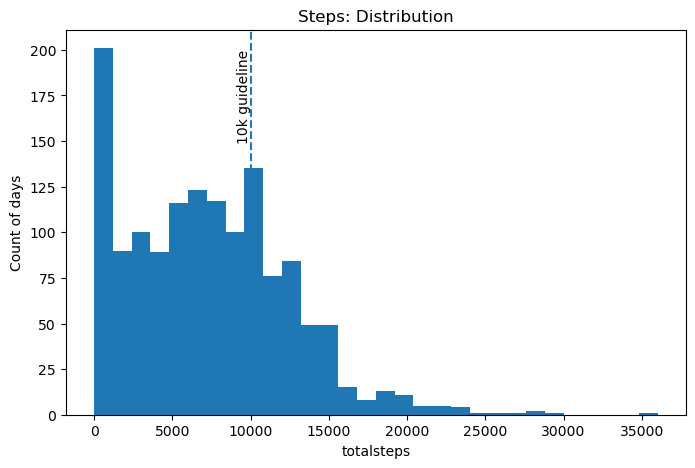

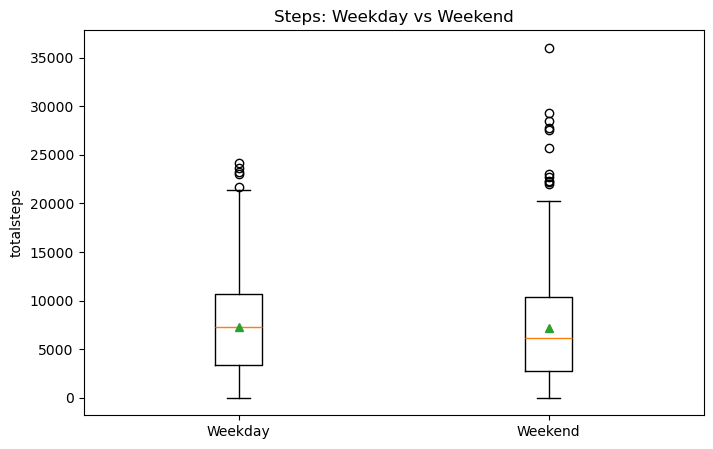

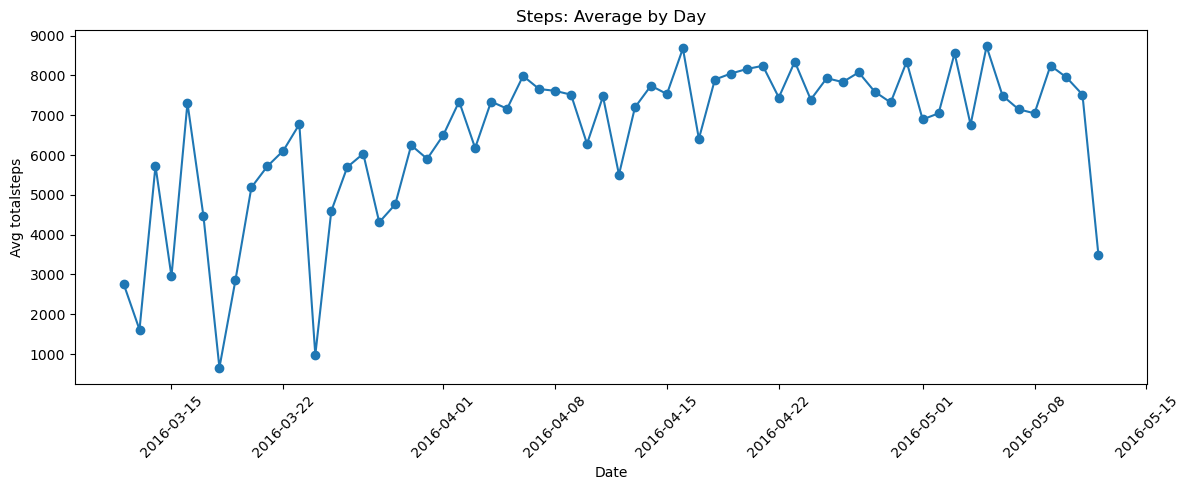


===== Summary: totalsteps =====
count     1397.000000
mean      7280.898354
std       5214.336113
min          0.000000
25%       3146.000000
50%       6999.000000
75%      10544.000000
max      36019.000000

Weekday stats:
count     1005.000000
mean      7317.029851
std       4935.326138
min          0.000000
25%       3365.000000
50%       7275.000000
75%      10645.000000
max      24136.000000

Weekend stats:
count      392.000000
mean      7188.265306
std       5875.240595
min          0.000000
25%       2788.750000
50%       6112.000000
75%      10333.750000
max      36019.000000


In [47]:
# Steps (with 10k guideline)
steps_summary = analyze_metric(
    daily, "totalsteps",
    guideline=10_000, guideline_label="10k guideline",
    title_prefix="Steps"
)


##### Calories Burned:

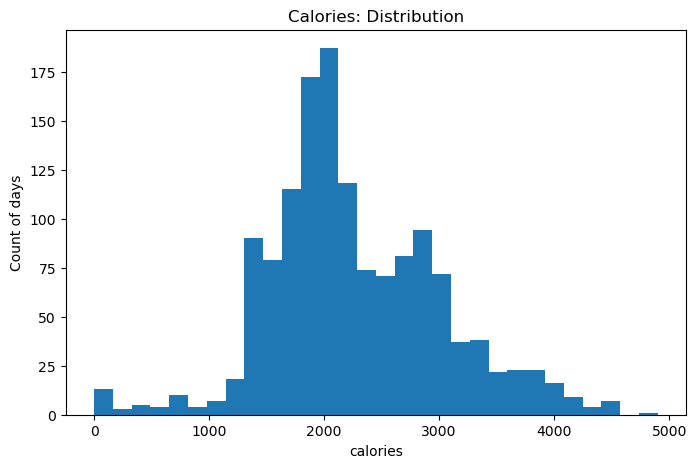

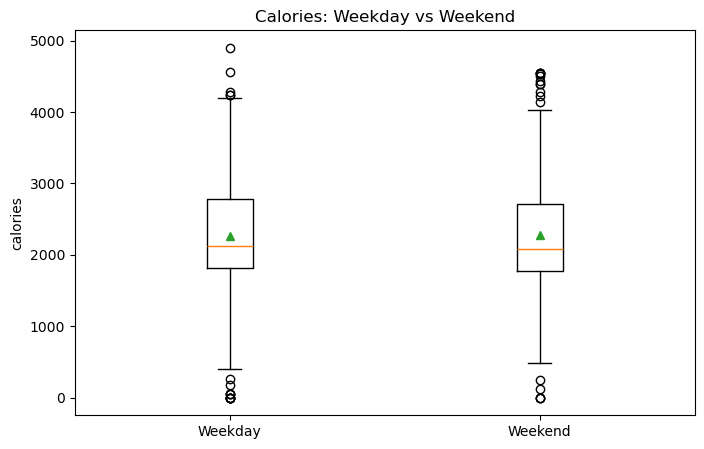

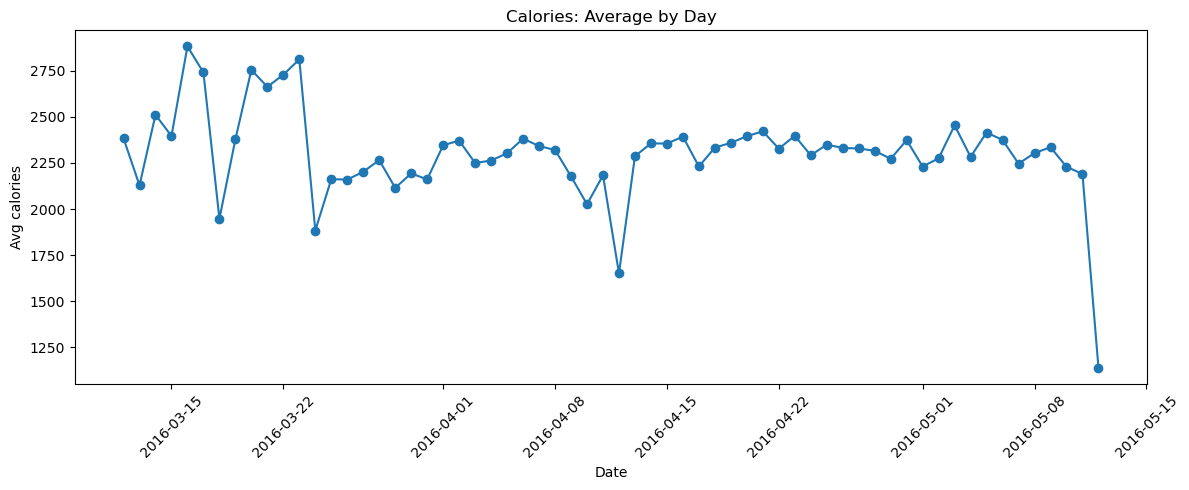


===== Summary: calories =====
count    1397.000000
mean     2266.265569
std       753.005527
min         0.000000
25%      1799.000000
50%      2114.000000
75%      2770.000000
max      4900.000000

Weekday stats:
count    1005.000000
mean     2261.938308
std       740.761282
min         0.000000
25%      1820.000000
50%      2124.000000
75%      2780.000000
max      4900.000000

Weekend stats:
count     392.000000
mean     2277.359694
std       784.385553
min         0.000000
25%      1776.000000
50%      2080.500000
75%      2718.750000
max      4552.000000


In [48]:
# Calories
cal_summary = analyze_metric(daily, "calories", title_prefix="Calories")


##### Distance:

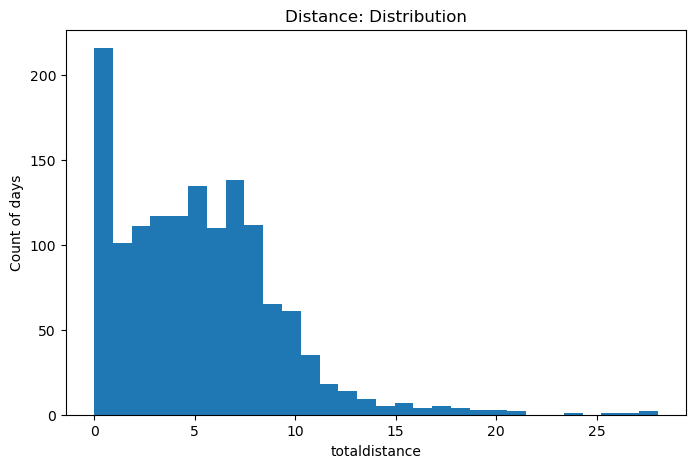

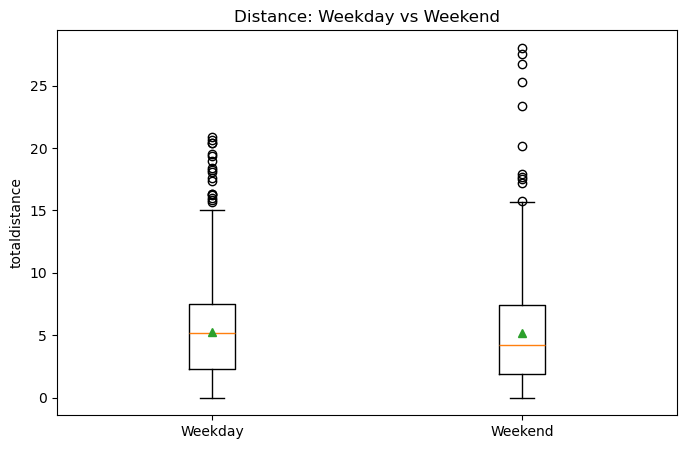

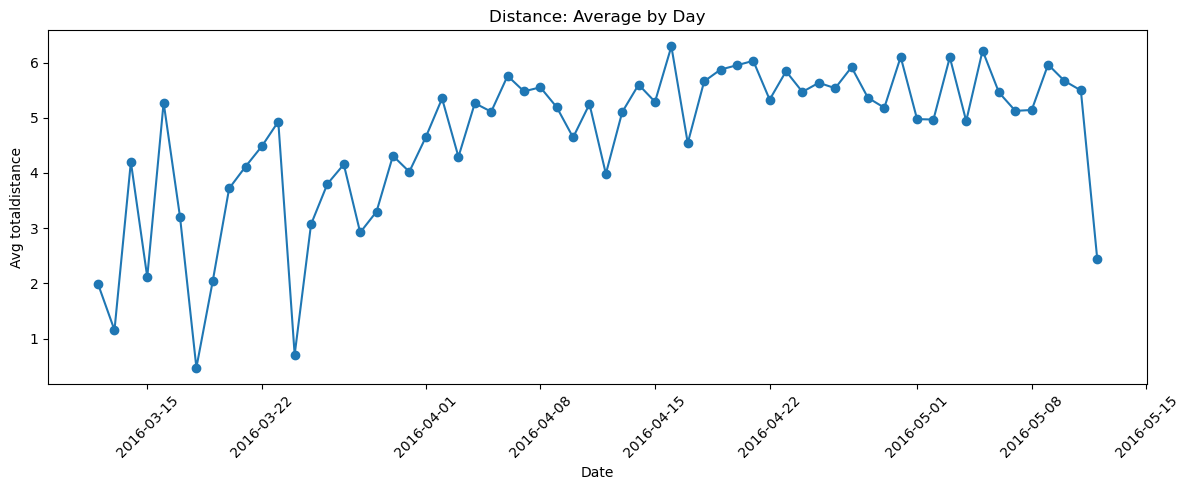


===== Summary: totaldistance =====
count    1397.000000
mean        5.219434
std         3.994206
min         0.000000
25%         2.170000
50%         4.950000
75%         7.500000
max        28.030001

Weekday stats:
count    1005.000000
mean        5.243254
std         3.749781
min         0.000000
25%         2.300000
50%         5.190000
75%         7.540000
max        20.910000

Weekend stats:
count    392.000000
mean       5.158367
std        4.566140
min        0.000000
25%        1.887500
50%        4.190000
75%        7.412500
max       28.030001


In [49]:
# Distance (you have 'totaldistance')
dist_summary = analyze_metric(daily, "totaldistance", title_prefix="Distance")


##### Active Minutes:

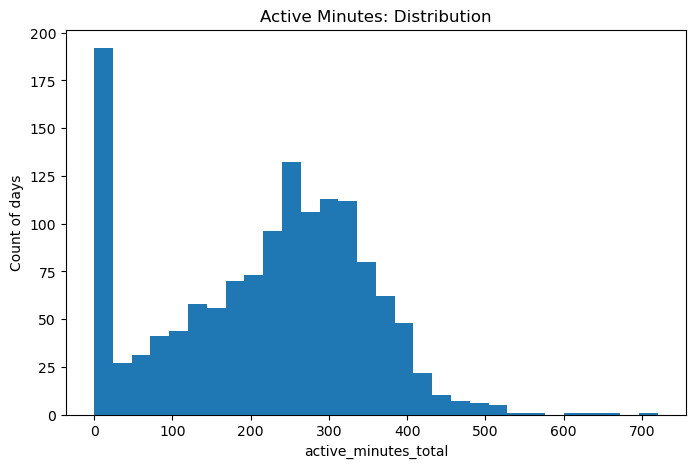

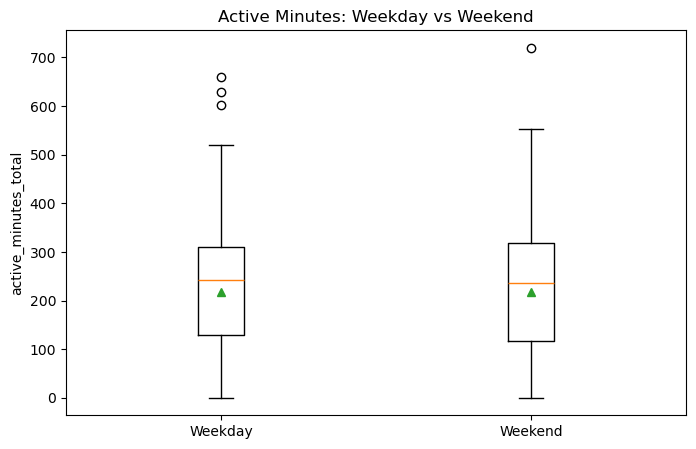

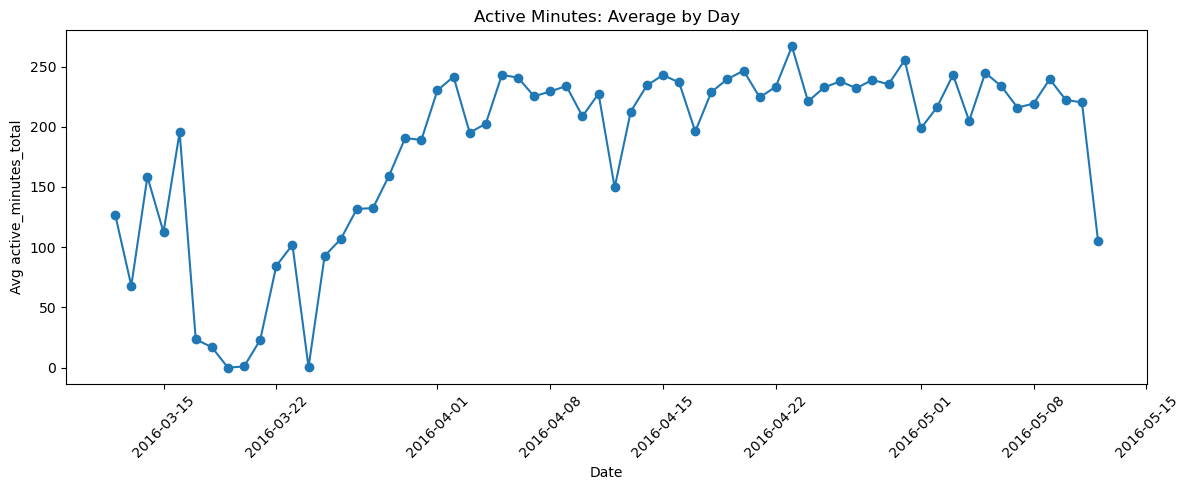


===== Summary: active_minutes_total =====
count    1397.000000
mean      218.455261
std       128.748674
min         0.000000
25%       125.000000
50%       242.000000
75%       313.000000
max       720.000000

Weekday stats:
count    1005.000000
mean      218.409950
std       125.515039
min         0.000000
25%       129.000000
50%       242.000000
75%       311.000000
max       660.000000

Weekend stats:
count    392.000000
mean     218.571429
std      136.856899
min        0.000000
25%      116.750000
50%      237.000000
75%      318.250000
max      720.000000


In [50]:
# Active minutes total (create once; then analyze)
if all(c in daily.columns for c in ["lightlyactiveminutes","fairlyactiveminutes","veryactiveminutes"]):
    daily["active_minutes_total"] = (
        daily["lightlyactiveminutes"].fillna(0) +
        daily["fairlyactiveminutes"].fillna(0) +
        daily["veryactiveminutes"].fillna(0)
    )
    actmin_summary = analyze_metric(daily, "active_minutes_total", title_prefix="Active Minutes")

##### Correlations:

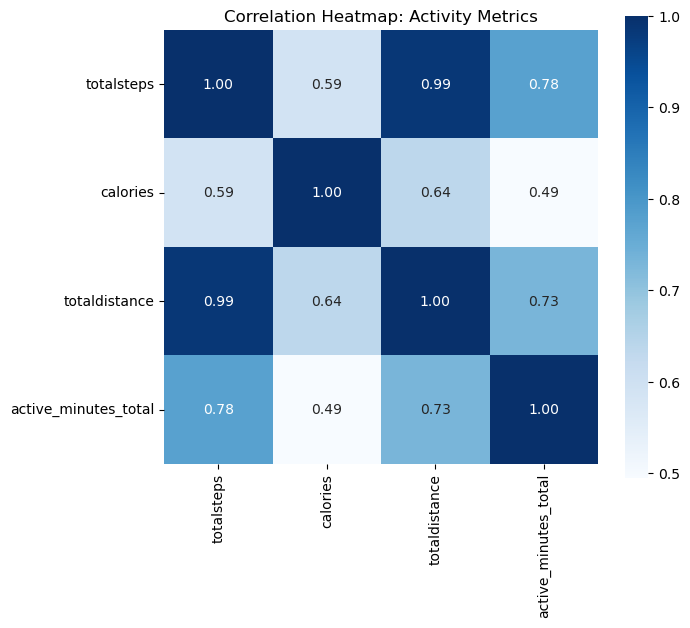

Correlation matrix:
                       totalsteps  calories  totaldistance  \
totalsteps                  1.00      0.59           0.99   
calories                    0.59      1.00           0.64   
totaldistance               0.99      0.64           1.00   
active_minutes_total        0.78      0.49           0.73   

                      active_minutes_total  
totalsteps                            0.78  
calories                              0.49  
totaldistance                         0.73  
active_minutes_total                  1.00  


In [51]:
# Pick the activity-related columns you want to compare
corr_cols = [c for c in ["totalsteps","calories","totaldistance","active_minutes_total"] if c in daily.columns]

if len(corr_cols) >= 2:
    corr_matrix = daily[corr_cols].corr()

    plt.figure(figsize=(7,6))
    sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, cbar=True)
    plt.title("Correlation Heatmap: Activity Metrics")
    plt.show()

    print("Correlation matrix:\n", corr_matrix.round(2))
else:
    print("⚠️ Not enough numeric activity columns available for correlation heatmap.")


#### Sleep:

##### Sleep Duration:

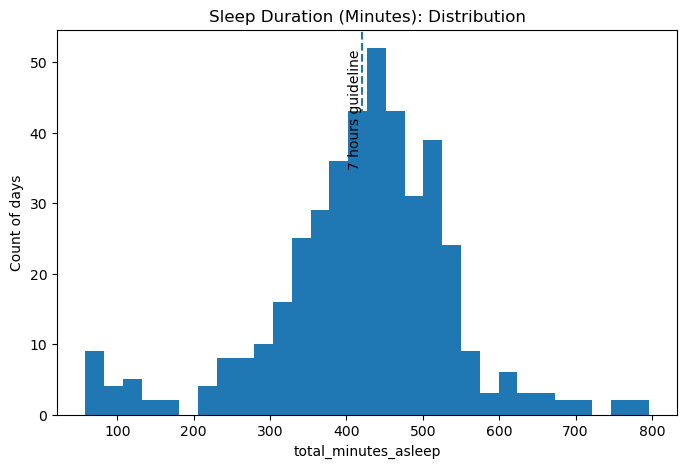

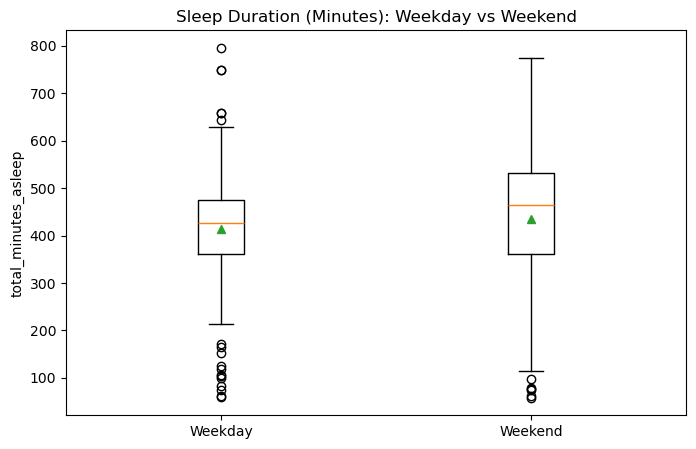

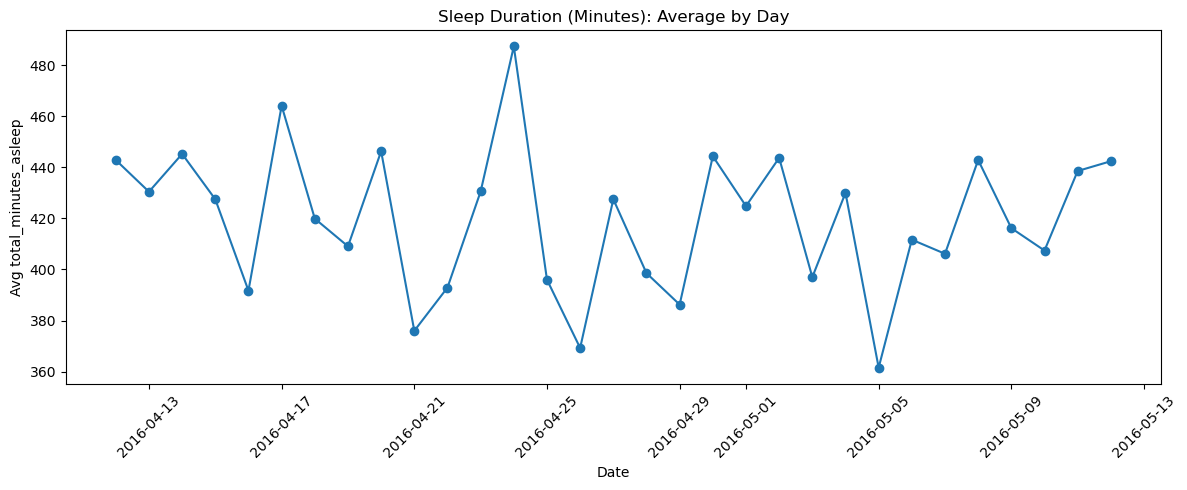


===== Summary: total_minutes_asleep =====
count    422.000000
mean     419.874408
std      118.677574
min       58.000000
25%      361.000000
50%      432.500000
75%      491.500000
max      796.000000

Weekday stats:
count    310.000000
mean     414.190323
std      104.484925
min       59.000000
25%      361.500000
50%      427.500000
75%      474.000000
max      796.000000

Weekend stats:
count    112.000000
mean     435.607143
std      150.626222
min       58.000000
25%      361.000000
50%      463.500000
75%      532.750000
max      775.000000


In [52]:
# Sleep duration (7 hours guideline)
sleep_summary = analyze_metric(
    daily, "total_minutes_asleep",
    guideline=420, guideline_label="7 hours guideline",
    title_prefix="Sleep Duration (Minutes)"
)

##### Sleep Efficiency:

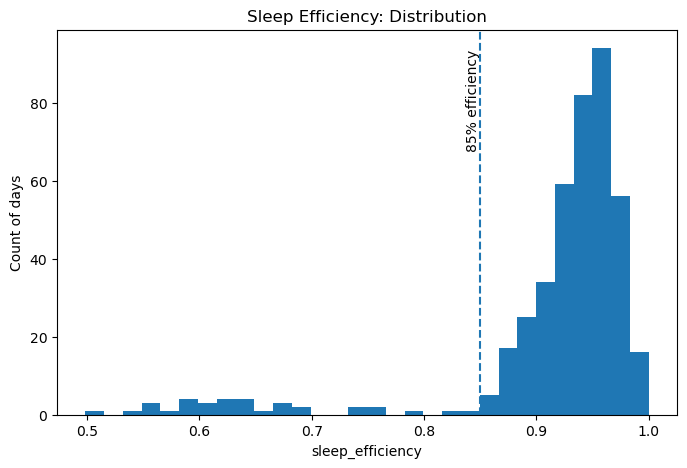

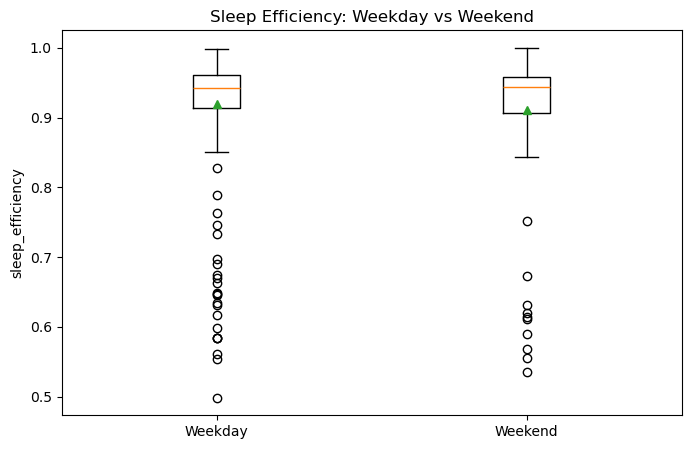

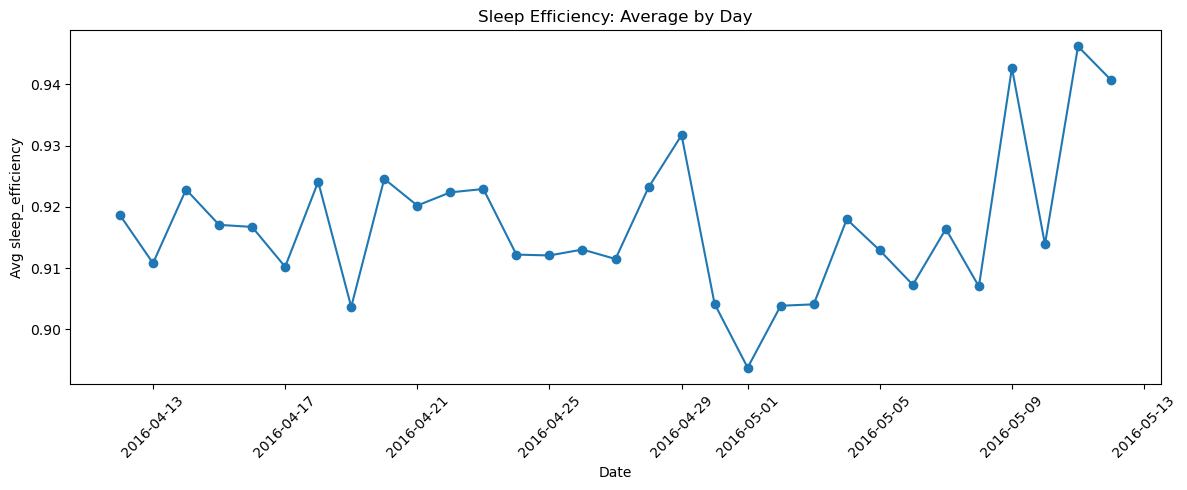


===== Summary: sleep_efficiency =====
count    422.000000
mean       0.916484
std        0.087730
min        0.498361
25%        0.912226
50%        0.942911
75%        0.960642
max        1.000000

Weekday stats:
count    310.000000
mean       0.918782
std        0.083016
min        0.498361
25%        0.913341
50%        0.942639
75%        0.960767
max        0.997763

Weekend stats:
count    112.000000
mean       0.910123
std        0.099754
min        0.534989
25%        0.906397
50%        0.943355
75%        0.957875
max        1.000000


In [53]:
# Sleep efficiency (85% guideline)
eff_summary = analyze_metric(
    daily, "sleep_efficiency",
    guideline=0.85, guideline_label="85% efficiency",
    title_prefix="Sleep Efficiency"
)

#### Weight:

In [54]:
# --- Basic check ---
print("Weight records:", len(weight))
print("Unique users with weight logs:", weight["user_id"].nunique() if "user_id" in weight.columns else None)


Weight records: 98
Unique users with weight logs: 13


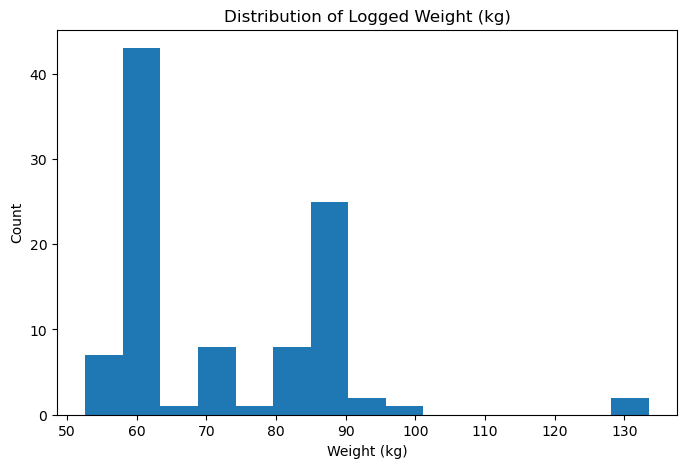

count     98.000000
mean      72.466327
std       14.820618
min       52.599998
25%       61.500000
50%       62.500000
75%       85.250002
max      133.500000
Name: weightkg, dtype: float64


In [55]:
# --- Weight distribution (kg) ---
if "weightkg" in weight.columns:
    plt.figure(figsize=(8,5))
    plt.hist(weight["weightkg"].dropna(), bins=15)
    plt.title("Distribution of Logged Weight (kg)")
    plt.xlabel("Weight (kg)")
    plt.ylabel("Count")
    plt.show()
    print(weight["weightkg"].describe())


In [56]:
weight.columns

Index(['user_id', 'date', 'weightkg', 'weightpounds', 'fat', 'bmi',
       'ismanualreport', 'logid'],
      dtype='object')

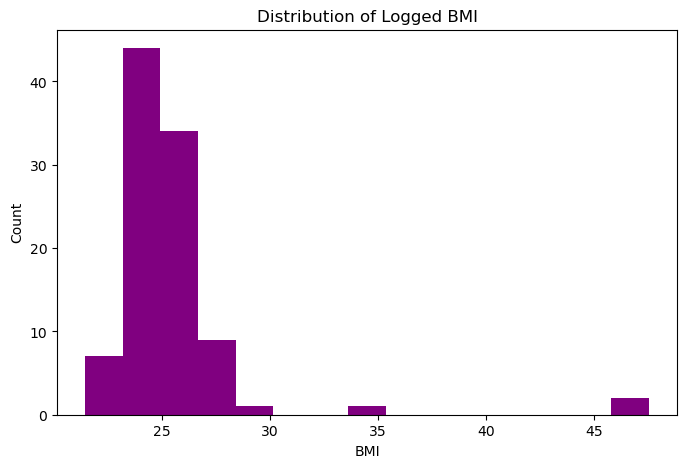

count    98.000000
mean     25.372041
std       3.555762
min      21.450001
25%      24.000000
50%      24.389999
75%      25.590000
max      47.540001
Name: bmi, dtype: float64


In [57]:
# --- BMI distribution ---
if "bmi" in weight.columns:
    plt.figure(figsize=(8,5))
    plt.hist(weight["bmi"].dropna(), bins=15, color="purple")
    plt.title("Distribution of Logged BMI")
    plt.xlabel("BMI")
    plt.ylabel("Count")
    plt.show()
    print(weight["bmi"].describe())


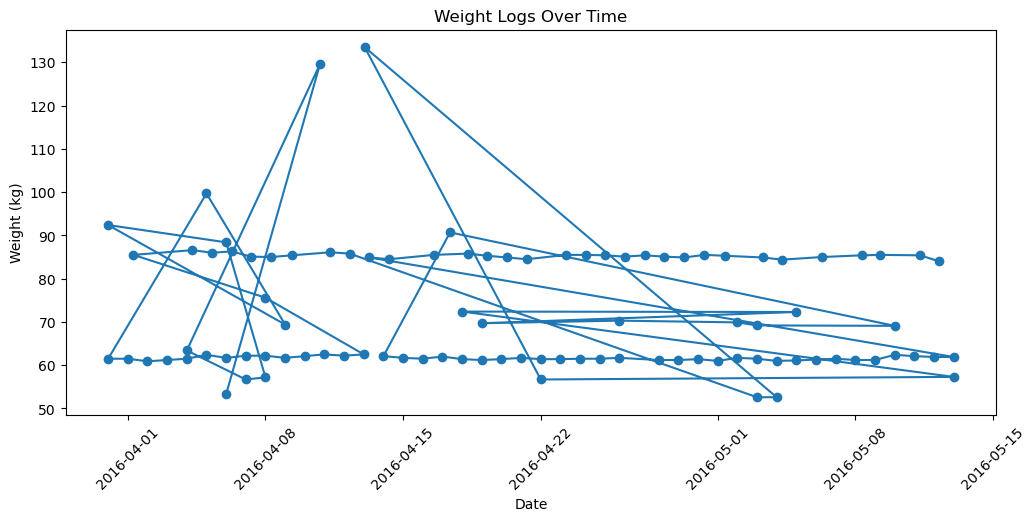

In [58]:
# --- Weight trend over time (if enough logs) ---
if "date" in weight.columns and "weightkg" in weight.columns:
    plt.figure(figsize=(12,5))
    plt.plot(weight["date"], weight["weightkg"], marker="o", linestyle="-")
    plt.title("Weight Logs Over Time")
    plt.xlabel("Date")
    plt.ylabel("Weight (kg)")
    plt.xticks(rotation=45)
    plt.show()

## Share Phase

### **Executive Summary**

This Share Phase distills insights from Activity, Sleep, and Weight analyses based on cleaned Fitbit data.

The analysis shows that users were inconsistently active, sleep quality varied with a subset below healthy efficiency, and weight logging was sparse. 

These patterns inform concrete product and marketing actions for Bellabeat.

### **Key Visuals:**

#### **Daily Steps**: Distribution, Weekday vs Weekend, Trend over time

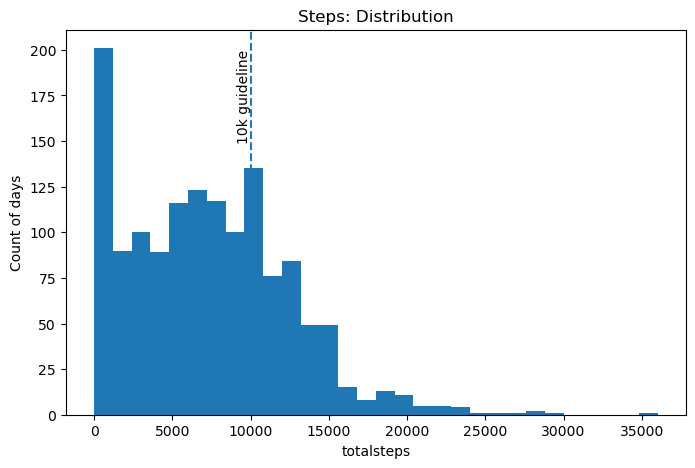

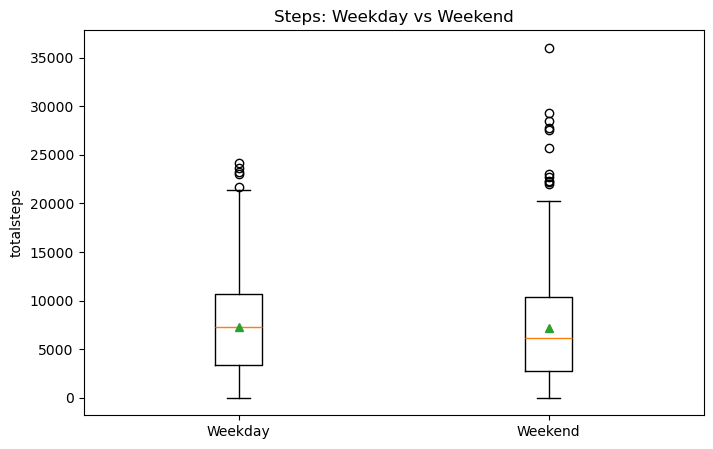

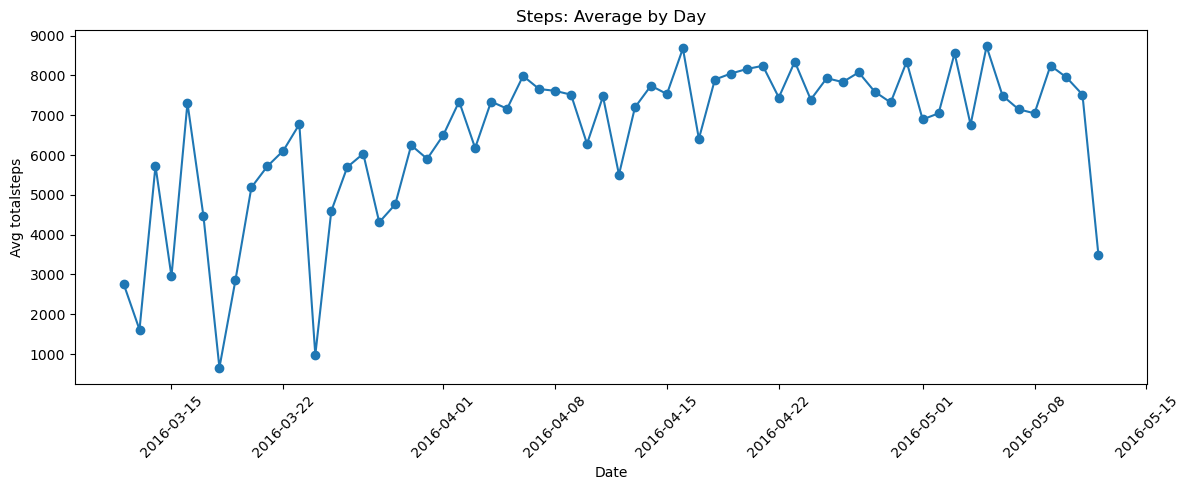


===== Summary: totalsteps =====
count     1397.000000
mean      7280.898354
std       5214.336113
min          0.000000
25%       3146.000000
50%       6999.000000
75%      10544.000000
max      36019.000000

Weekday stats:
count     1005.000000
mean      7317.029851
std       4935.326138
min          0.000000
25%       3365.000000
50%       7275.000000
75%      10645.000000
max      24136.000000

Weekend stats:
count      392.000000
mean      7188.265306
std       5875.240595
min          0.000000
25%       2788.750000
50%       6112.000000
75%      10333.750000
max      36019.000000


In [59]:
# Steps (with 10k guideline)
steps_summary = analyze_metric(
    daily, "totalsteps",
    guideline=10_000, guideline_label="10k guideline",
    title_prefix="Steps"
)

#### **Calories Burned:** Distribution, Weekday vs Weekend, Trend over time

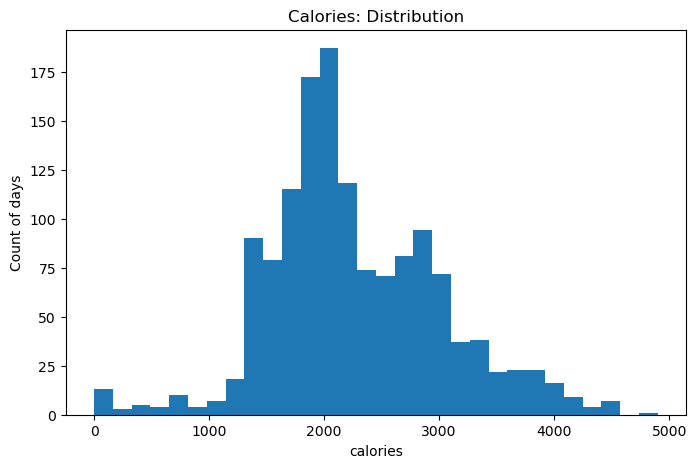

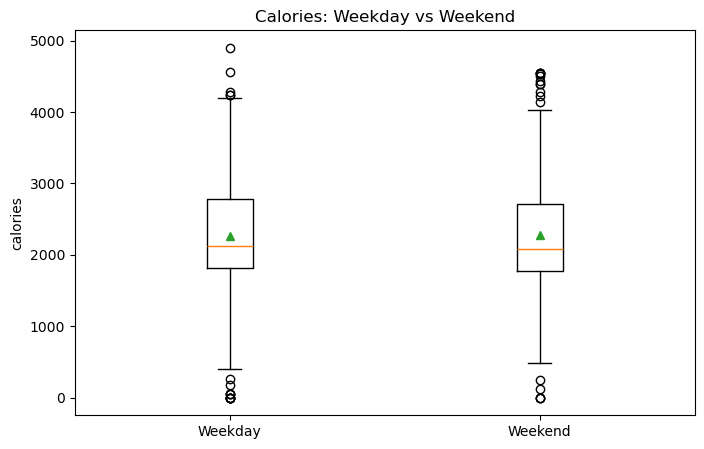

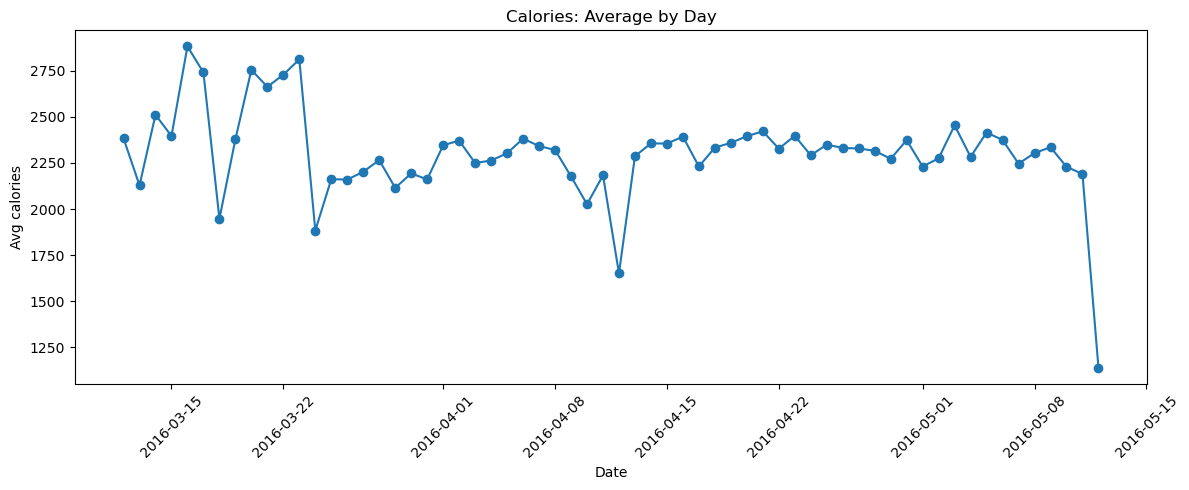


===== Summary: calories =====
count    1397.000000
mean     2266.265569
std       753.005527
min         0.000000
25%      1799.000000
50%      2114.000000
75%      2770.000000
max      4900.000000

Weekday stats:
count    1005.000000
mean     2261.938308
std       740.761282
min         0.000000
25%      1820.000000
50%      2124.000000
75%      2780.000000
max      4900.000000

Weekend stats:
count     392.000000
mean     2277.359694
std       784.385553
min         0.000000
25%      1776.000000
50%      2080.500000
75%      2718.750000
max      4552.000000


In [60]:
cal_summary = analyze_metric(daily, "calories", title_prefix="Calories")


#### **Total Distance:** Distribution, Weekday vs Weekend, Trend over time

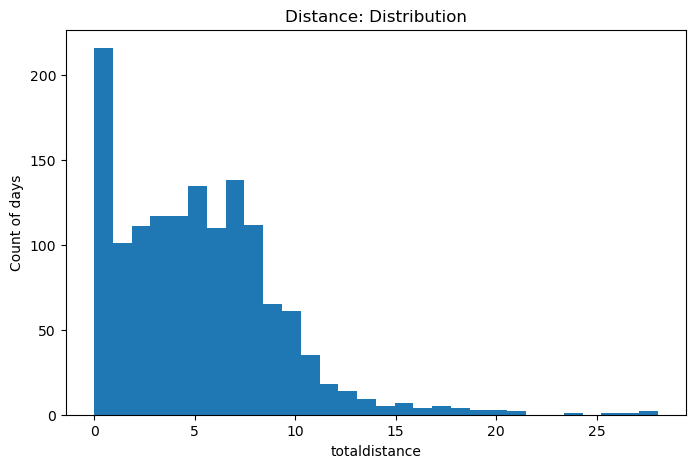

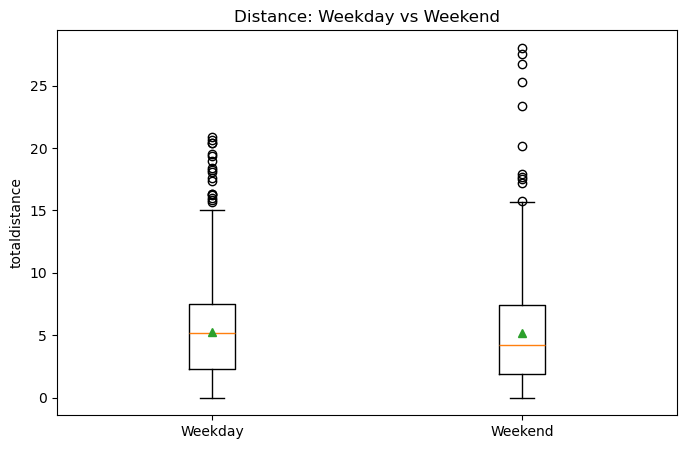

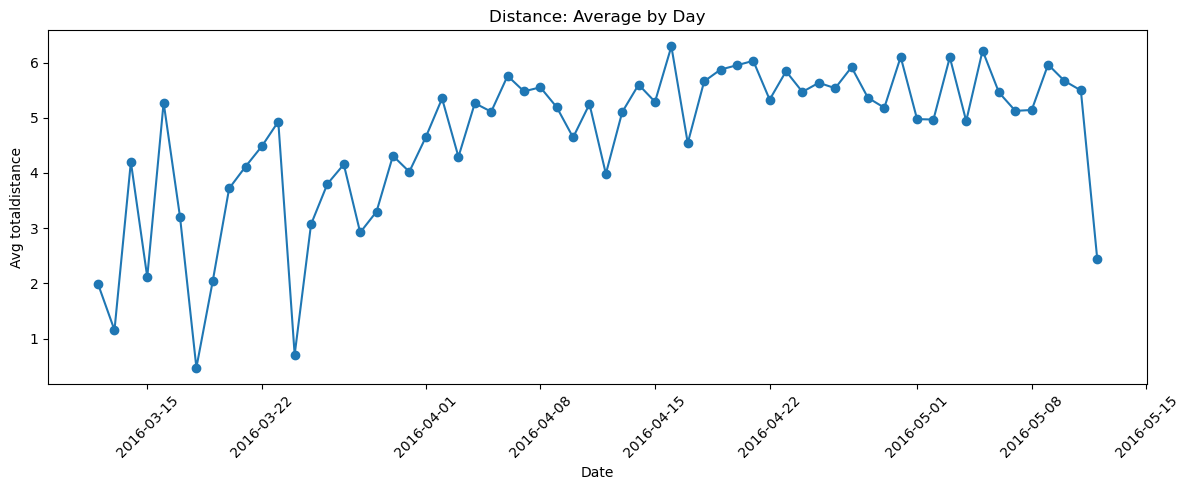


===== Summary: totaldistance =====
count    1397.000000
mean        5.219434
std         3.994206
min         0.000000
25%         2.170000
50%         4.950000
75%         7.500000
max        28.030001

Weekday stats:
count    1005.000000
mean        5.243254
std         3.749781
min         0.000000
25%         2.300000
50%         5.190000
75%         7.540000
max        20.910000

Weekend stats:
count    392.000000
mean       5.158367
std        4.566140
min        0.000000
25%        1.887500
50%        4.190000
75%        7.412500
max       28.030001


In [61]:
dist_summary = analyze_metric(daily, "totaldistance", title_prefix="Distance")


#### **Active Minutes (Total):** Distribution, Weekday vs Weekend, Trend over time

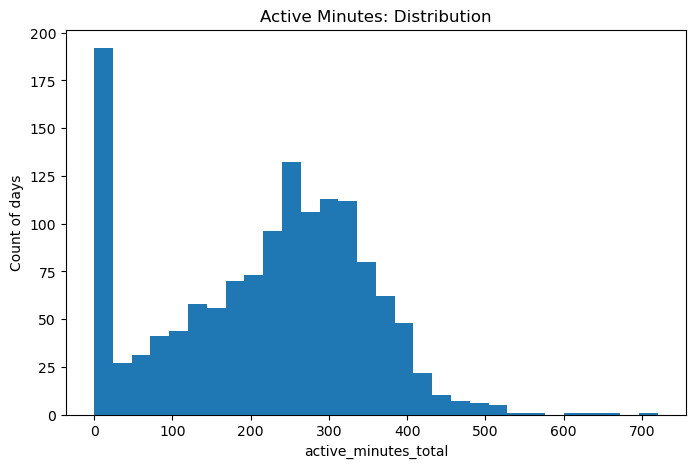

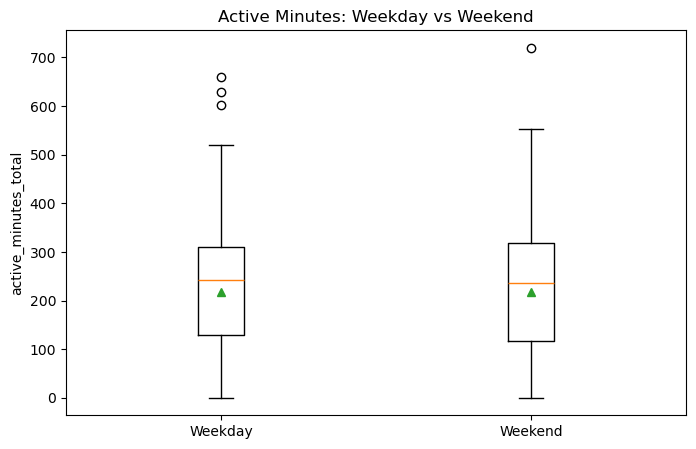

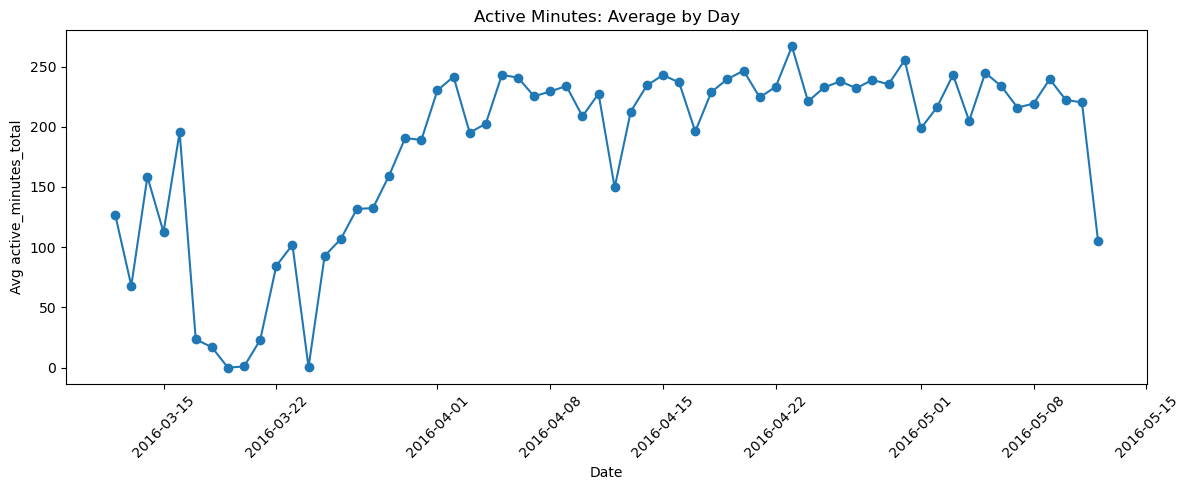


===== Summary: active_minutes_total =====
count    1397.000000
mean      218.455261
std       128.748674
min         0.000000
25%       125.000000
50%       242.000000
75%       313.000000
max       720.000000

Weekday stats:
count    1005.000000
mean      218.409950
std       125.515039
min         0.000000
25%       129.000000
50%       242.000000
75%       311.000000
max       660.000000

Weekend stats:
count    392.000000
mean     218.571429
std      136.856899
min        0.000000
25%      116.750000
50%      237.000000
75%      318.250000
max      720.000000


In [62]:
actmin_summary = analyze_metric(daily, "active_minutes_total", title_prefix="Active Minutes")

#### **Minutes Asleep:** Distribution, Weekday vs Weekend, Trend over time

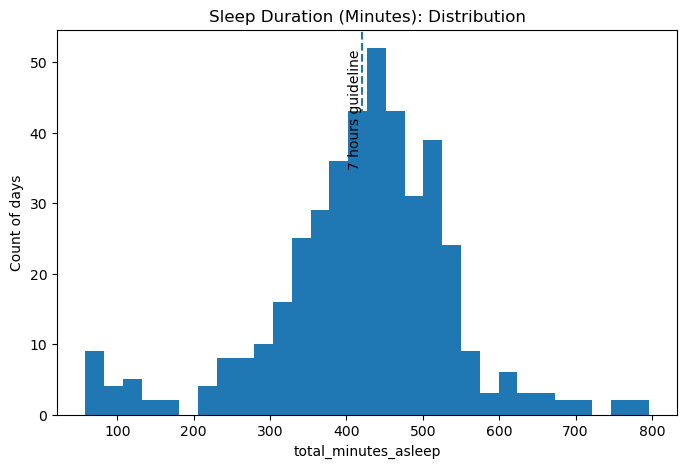

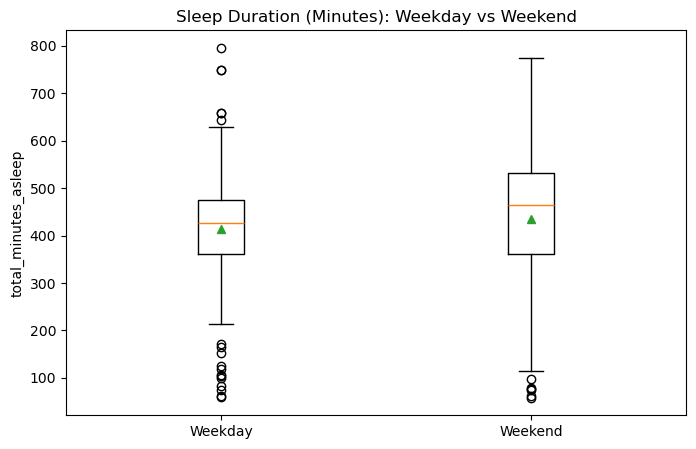

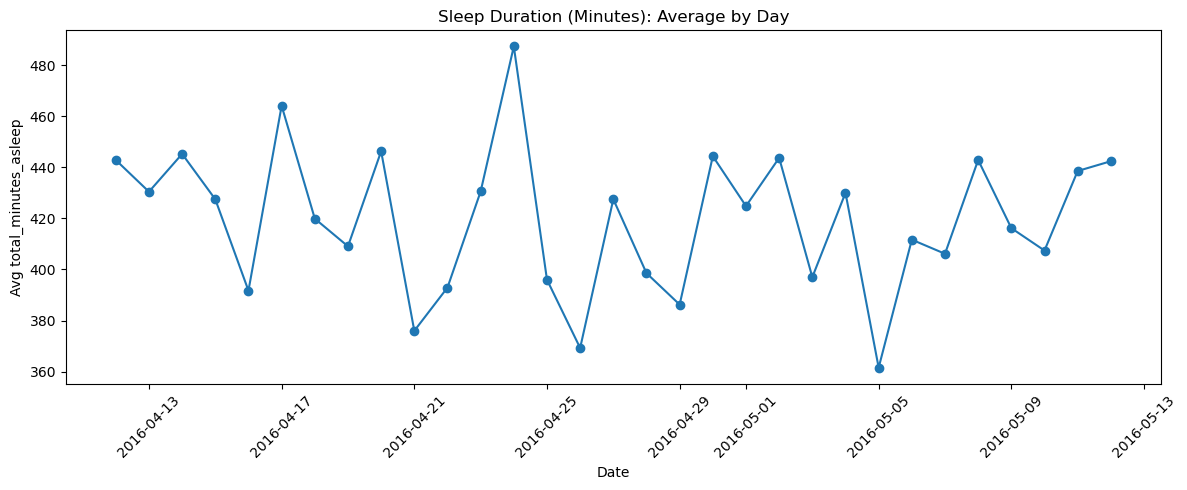


===== Summary: total_minutes_asleep =====
count    422.000000
mean     419.874408
std      118.677574
min       58.000000
25%      361.000000
50%      432.500000
75%      491.500000
max      796.000000

Weekday stats:
count    310.000000
mean     414.190323
std      104.484925
min       59.000000
25%      361.500000
50%      427.500000
75%      474.000000
max      796.000000

Weekend stats:
count    112.000000
mean     435.607143
std      150.626222
min       58.000000
25%      361.000000
50%      463.500000
75%      532.750000
max      775.000000


In [63]:
sleep_summary = analyze_metric(
    daily, "total_minutes_asleep",
    guideline=420, guideline_label="7 hours guideline",
    title_prefix="Sleep Duration (Minutes)"
)

#### **Sleep Efficiency:** Distribution, Weekday vs Weekend, Trend over time

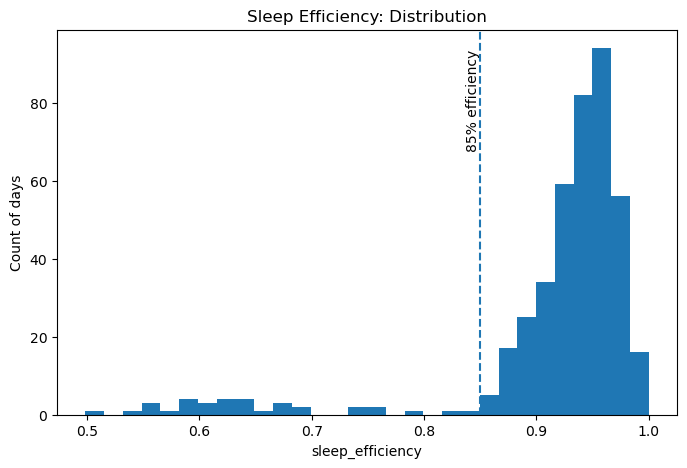

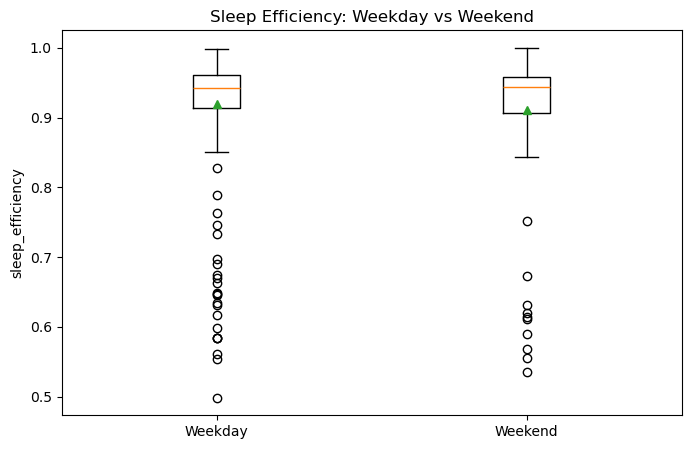

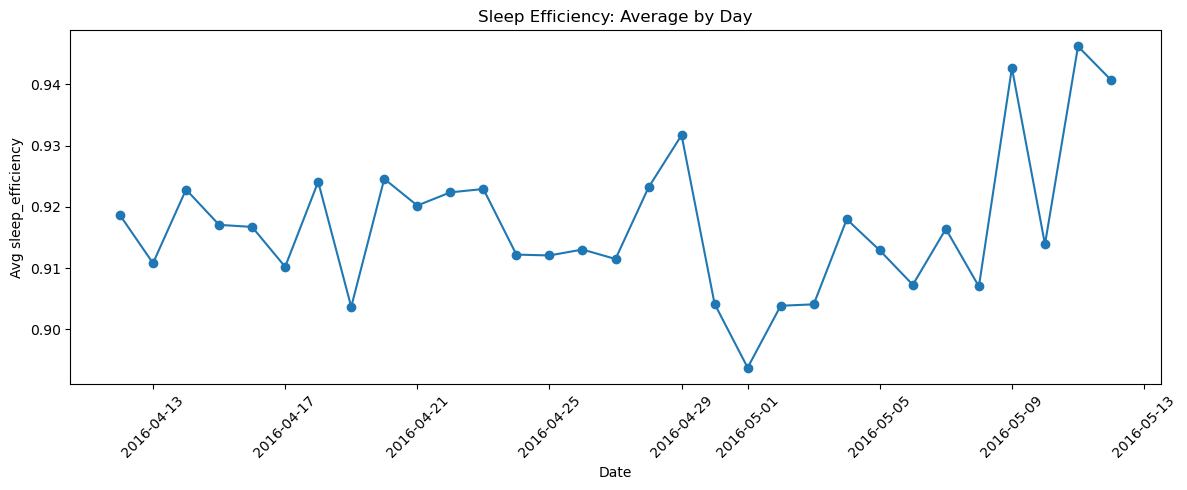


===== Summary: sleep_efficiency =====
count    422.000000
mean       0.916484
std        0.087730
min        0.498361
25%        0.912226
50%        0.942911
75%        0.960642
max        1.000000

Weekday stats:
count    310.000000
mean       0.918782
std        0.083016
min        0.498361
25%        0.913341
50%        0.942639
75%        0.960767
max        0.997763

Weekend stats:
count    112.000000
mean       0.910123
std        0.099754
min        0.534989
25%        0.906397
50%        0.943355
75%        0.957875
max        1.000000


In [64]:
eff_summary = analyze_metric(
    daily, "sleep_efficiency",
    guideline=0.85, guideline_label="85% efficiency",
    title_prefix="Sleep Efficiency"
)

#### **Correlation Heatmap:** Activity metrics

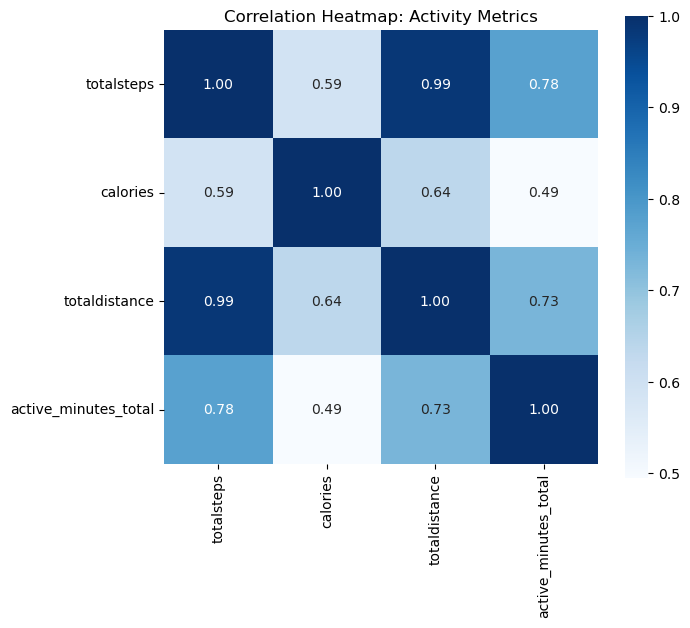

Correlation matrix:
                       totalsteps  calories  totaldistance  \
totalsteps                  1.00      0.59           0.99   
calories                    0.59      1.00           0.64   
totaldistance               0.99      0.64           1.00   
active_minutes_total        0.78      0.49           0.73   

                      active_minutes_total  
totalsteps                            0.78  
calories                              0.49  
totaldistance                         0.73  
active_minutes_total                  1.00  


In [65]:
corr_cols = [c for c in ["totalsteps","calories","totaldistance","active_minutes_total"] if c in daily.columns]

if len(corr_cols) >= 2:
    corr_matrix = daily[corr_cols].corr()

    plt.figure(figsize=(7,6))
    sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, cbar=True)
    plt.title("Correlation Heatmap: Activity Metrics")
    plt.show()

    print("Correlation matrix:\n", corr_matrix.round(2))
else:
    print("⚠️ Not enough numeric activity columns available for correlation heatmap.")


### **Key Findings:**

- **Activity**: Many users did not consistently reach the 10k-step guideline; weekends tended to be more active than weekdays, and sedentary minutes dominated.

- **Calories/Distance**: Strong positive relationship with steps; increasing movement directly increases calories burned and distance.

- **Sleep**: Average duration below 7 hours for many users; most users above 85% efficiency, but a notable subgroup shows poor efficiency (restless sleep).

- **Weight**: Very few users logged weight; entries are irregular and concentrated in short periods.

### **Business Recommendations**:

- **Gamify Activity:** Daily goals, weekend challenges, streaks; nudge to reduce sedentary time on weekdays.

- **Sleep Coaching:** Bedtime reminders, relaxation routines, and tips targeting users with low efficiency or short duration.

- **Optional Weight Tracking:** Integrate with nutrition/hydration features; position as a premium insight for engaged users.

## Act Phase

### Objective

Translate analytical insights into actionable strategies that enhance user engagement, improve wellness outcomes, and strengthen Bellabeat’s product-market fit.

---

### 1. Key Strategic Actions

| Focus Area | Action | Description | Expected Impact | KPI / Metric |
|-------------|---------|--------------|------------------|---------------|
| **Activity Engagement** | Launch gamified step challenges | Weekly & weekend challenges to motivate consistent movement | Increase average daily steps | +15% in average daily steps within 3 months |
| **Sedentary Behavior** | Introduce “Move Reminders” | In-app nudges during prolonged inactivity | Reduce sedentary minutes per user | -10% sedentary time per day |
| **Sleep Coaching** | Add personalized bedtime routines | Provide recommendations & relaxation exercises | Improve sleep duration & efficiency | +10% average sleep efficiency |
| **User Retention** | Reward streaks & achievements | Recognition badges for step/sleep consistency | Boost long-term engagement | +20% monthly active users |
| **Weight Tracking** | Integrate optional nutrition/hydration tracking | Encourage frequent logging for motivated users | Enhance health insights for engaged users | +25% increase in weight log frequency |


---

### 2. Implementation Plan

| Phase | Timeline | Key Tasks |
|--------|-----------|------------|
| **Short-Term (0–3 months)** | Design & A/B test in-app step challenges | Product & UX teams |
| **Mid-Term (3–6 months)** | Launch sleep coaching feature; refine reminders | Product, Data Science, and Marketing teams |
| **Long-Term (6–12 months)** | Integrate weight tracking & nutrition insights; track KPI improvements | Product & Partnerships teams |


---

### 3. Measurement & Continuous Improvement
- Establish a **dashboard** tracking key KPIs (steps, sleep, engagement).  
- Use **cohort analysis** to evaluate new feature adoption and retention.  
- Continue **data collection** to validate behavior changes and identify new trends.  
- Conduct **user feedback surveys** to measure perceived wellness improvement.

---

### 4. Business Impact
These actions are designed to:
- Strengthen **Bellabeat’s app ecosystem** as a holistic health platform.  
- Increase user **engagement and retention** through personalization and gamification.  
- Differentiate Bellabeat from competitors by offering **actionable, data-backed wellness guidance**.


---

### Final Note
The Act phase closes the data cycle by ensuring that analytical insights lead to tangible value creation.  
By executing these recommendations, Bellabeat can transform user behavior data into **smarter engagement strategies** and **sustainable business growth**.